# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221201_073500_reaching_go_spout_bar_nov22.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221201_073500_reaching_go_spout_bar_nov22"
```

Quick analysis of instrumental reaching

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


### Variables

In [36]:
import pandas as pd
from pathlib import Path
trial_window = [-4000, 8000] # in ms

# time limit around trigger to perform an event determine successful trials
# timelim = [1000, 4000] # in ms useless here, to deprecate 
# in favor of computing presence of an event during certain states for success in the future

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pyphotometry/data/reaching_go_spout_bar_nov22')
pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol/reaching_go_spout_bar_nov22')

# # From julien-pc
# photometry_dir = Path(r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pyphotometry\data\reaching_go_spout_bar_nov22')
# pycontrol_dir = Path(r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22')

# From laptop
# photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry'
# pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [90]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=str(pycontrol_dir), int_subject_IDs=True, update=True, verbose=False)

Saved sessions loaded from: sessions.pkl


### Select only Rasha's animals

In [91]:
exp_cohort.sessions = [session for session in exp_cohort.sessions if (session.subject_ID > 600) and (session.subject_ID < 700)]

### Perform extraction of behavioural information by trial

In [92]:
# Process the whole experimental folder by trials

exp_cohort.process_exp_by_trial(trial_window=trial_window, timelim=None, tasksfile=tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

processing by trial: RE604-2023-03-14-092522.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-14-093001.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-15-114819.txt task: reaching_go_spout_bar_mar23
processing by trial: RE602-2023-03-16-091935.txt task: reaching_go_spout_bar_mar23
processing by trial: RE602-2023-03-16-093926.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-16-102419.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-17-090113.txt task: reaching_go_spout_bar_mar23
processing by trial: RE602-2023-03-17-092307.txt task: reaching_go_spout_bar_nov22
processing by trial: RE602-2023-03-17-150753.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-20-094835.txt task: reaching_go_spout_bar_mar23
processing by trial: RE602-2023-03-20-145614.txt task: reaching_go_spout_bar_mar23
processing by trial: RE602-2023-03-21-143610.txt task: reaching_go_spout_bar_mar23
proc

### Number of sessions for Rasha's animals

In [58]:
len(exp_cohort.sessions)

30

### Defining conditions to categorize trials

In [72]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'button_press': False, 'break_after_abort': False, 'water by spout': True}

conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'button_press': False, 'break_after_abort': False}

conditions_dict3 = {'trigger': 'hold_for_water', 'success': False, 'button_press': False, 'break_after_abort': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2, conditions_dict3]
# Aliases for conditions
cond_aliases = ['hit','miss','abort']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


### Extracting an event_dataset from an Experiment (experimental folder)

In [39]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()

saved /home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol/reaching_go_spout_bar_nov22/sessions.pkl


## Match and synchronize photometry to behaviour

In [94]:
ev_dataset = exp_cohort.behav_events_to_dataset(
    groups=None,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names=['reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_mar23', 'reaching_go_spout_feb23'],
    trig_on_ev=None
)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

### From the whole experiment, only filter a subset of sessions

In [95]:
# reset previous filters
ev_dataset.filter_reset()

# define new filters
# bool_filter = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(
#     [date(2022,12,16),
#     date(2022,12,17),
#     date(2022,12,18),
#     date(2022,12,19),
#     date(2022,12,20)]))
# get_tfkeep_dates will need to take date or time intervals as input

# apply filters to metadata_df


# you can still apply additional filtering thanks to other methods like:
ev_dataset.filter_lastNsessions(5) # keep only the last 3 sessions for each subject

# We'll need to find a way to plot lines between sessions and/or indicate dates/subjects
# in y axis but that will be a bit tricky to make both flexible and easy to use/implement
ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'], module='plotly')


### Behaviour: Compute distribution and optionally turn to a Continuous_Dataset
- You will note here that the structure of the data and metadata changes (maybe a bit of more consistency could be added, but the biggest difference is continous data is stored as np.ndarray with dim = trials x variables x times)


In [102]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 500, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

In [103]:
ev_dataset.metadata_df.subject_ID.unique()

array([602, 603, 604])

In [104]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])
dist_as_continuous.filter_lastNsessions(3)
# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

True    41
Name: keep, dtype: int64

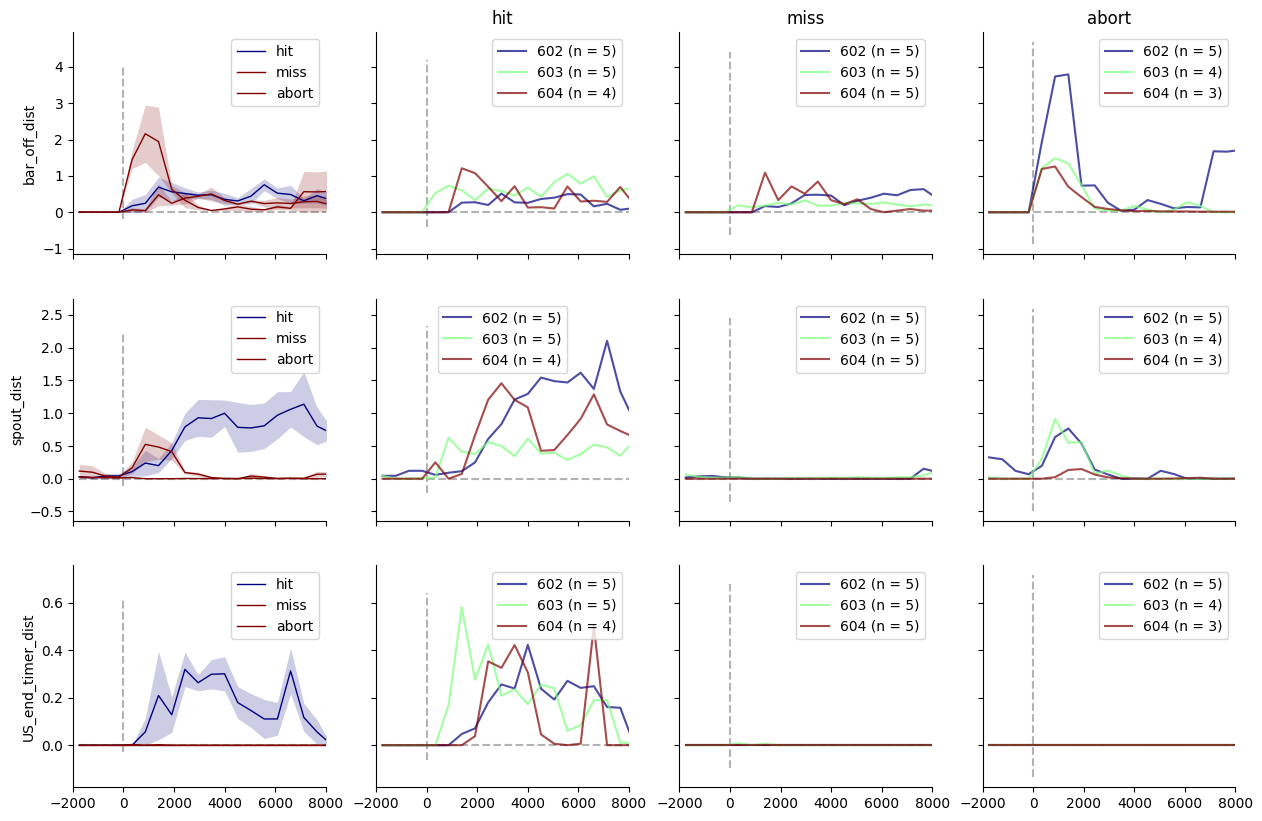

In [105]:
dist_as_continuous.filter_reset()
dist_as_continuous.filter_lastNsessions(n = 5)
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist','US_end_timer_dist'],
    time_lim = [-2000,8000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Match and synchronize photometry to behaviour

In [106]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


saved /home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol/reaching_go_spout_bar_nov22/sessions.pkl


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [108]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22', 'reaching_go_spout_bar_mar23', 'reaching_go_spout_feb23'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            baseline_low_pass = 0.01, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True



No trial in any condition for subject 604 at: 2023-03-29 16:14:31
No trial in any condition for subject 604 at: 2023-03-29 16:14:31
No trial in any condition for subject 604 at: 2023-03-29 16:14:31
No trial in any condition for subject 604 at: 2023-03-29 16:14:31


Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 604
cond_ID: 1, group_idx 0, subj 602
cond_ID: 1, group_idx 0, subj 604
cond_ID: 2, group_idx 0, subj 602
cond_ID: 2, group_idx 0, subj 604
cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 604
cond_ID: 1, group_idx 0, subj 602
cond_ID: 1, group_idx 0, subj 604
cond_ID: 2, group_idx 0, subj 602
cond_ID: 2, group_idx 0, subj 604
cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 604
cond_ID: 1, group_idx 0, subj 602
cond_ID: 1, group_idx 0, subj 604
cond_ID: 2, group_idx 0, subj 602
cond_ID: 2, group_idx 0, subj 604
cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 604
cond_ID: 1, group_idx 0, subj 602
cond_ID: 1, group_idx 0, subj 604
cond_ID: 2, group_idx 0, subj 602
cond_ID: 2, group_idx 0, subj 604
cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 604


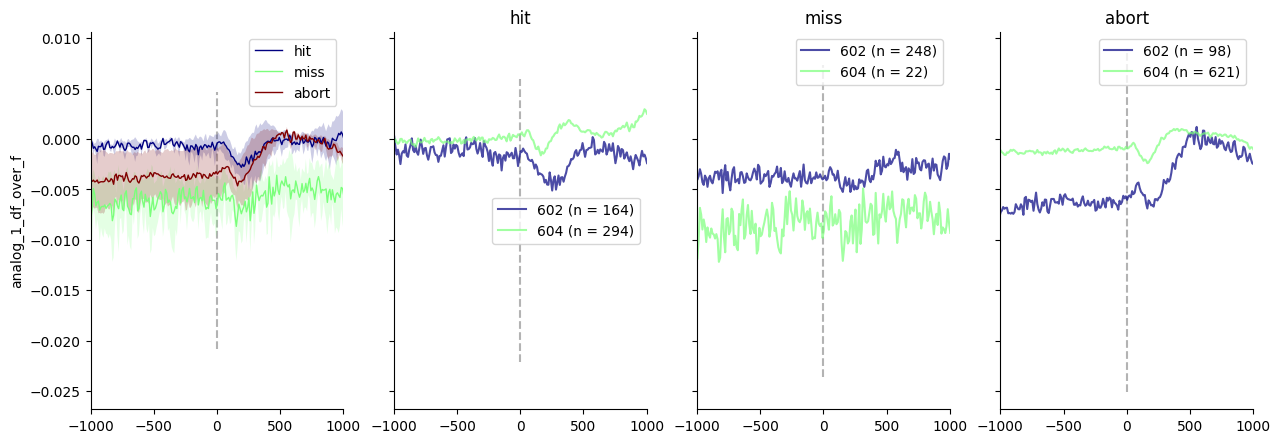

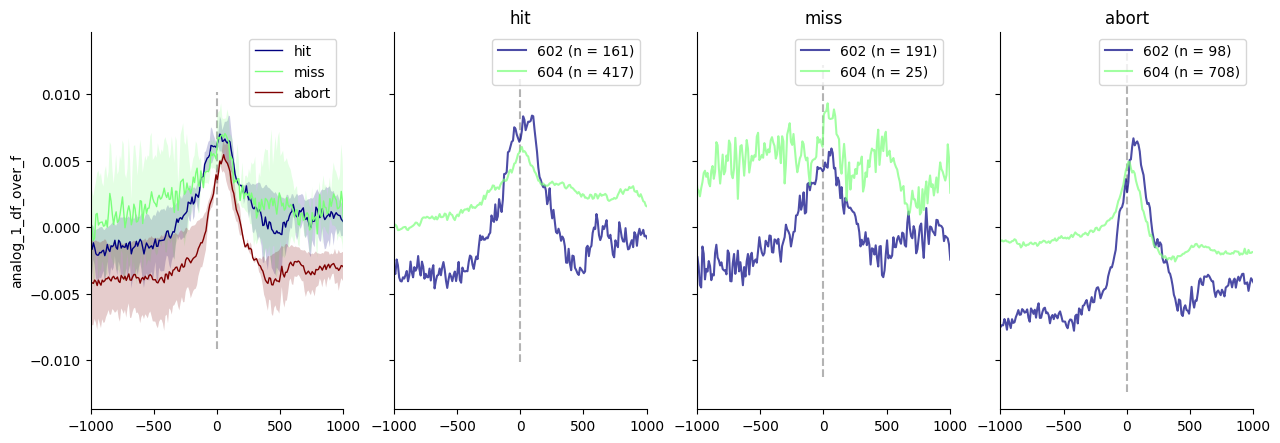

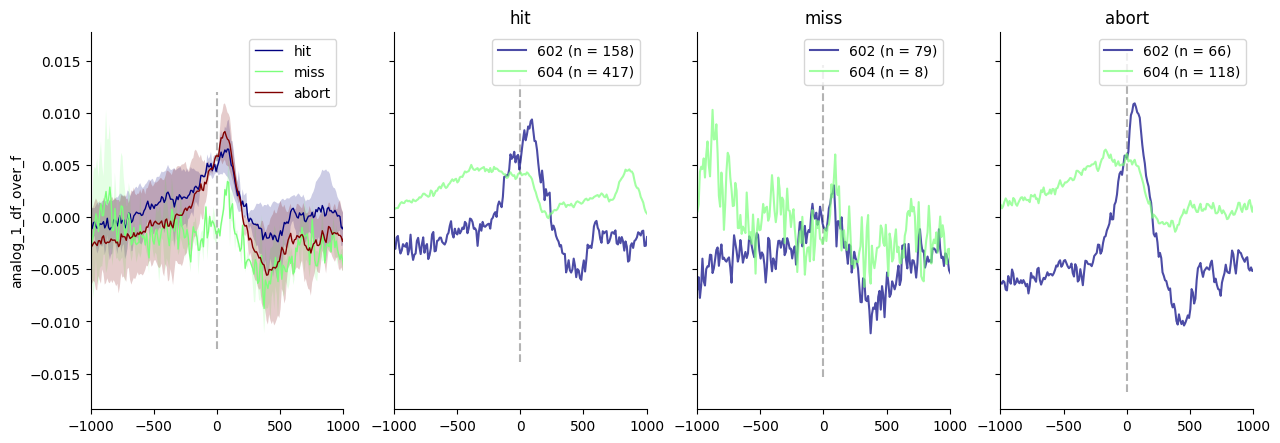

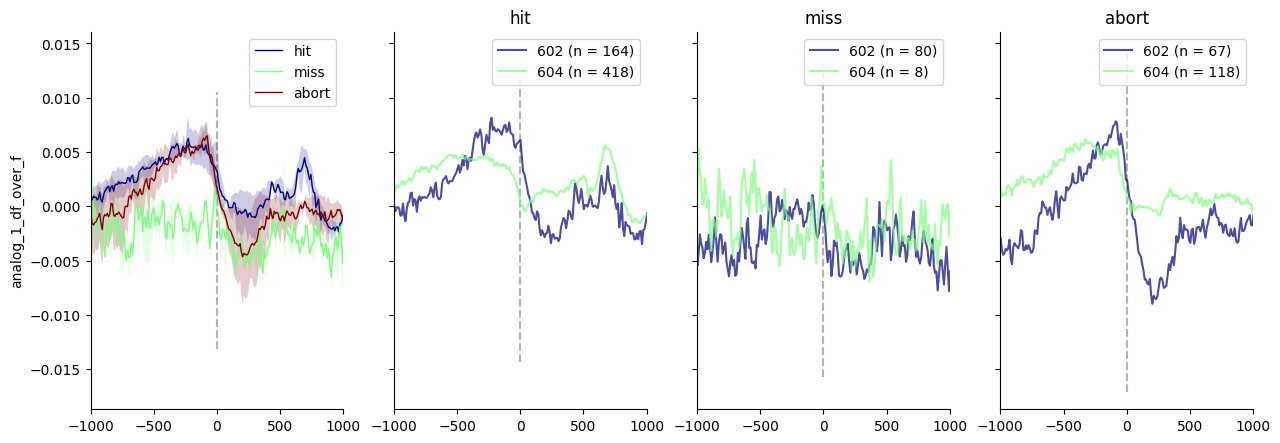

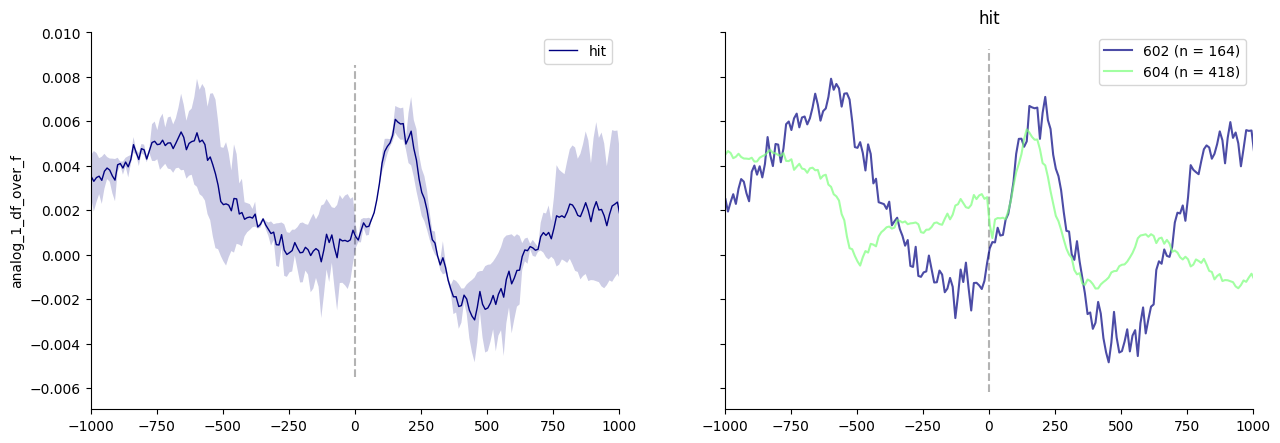

In [112]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([603]) # add other animals here if need be
    # photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 5) # 5 last sessions
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 1000],
        # time_unit = 'seconds',
        ylim = None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)


### The plots will contain aggegated trials from multiple sessions with each single line corresponding to a single trial

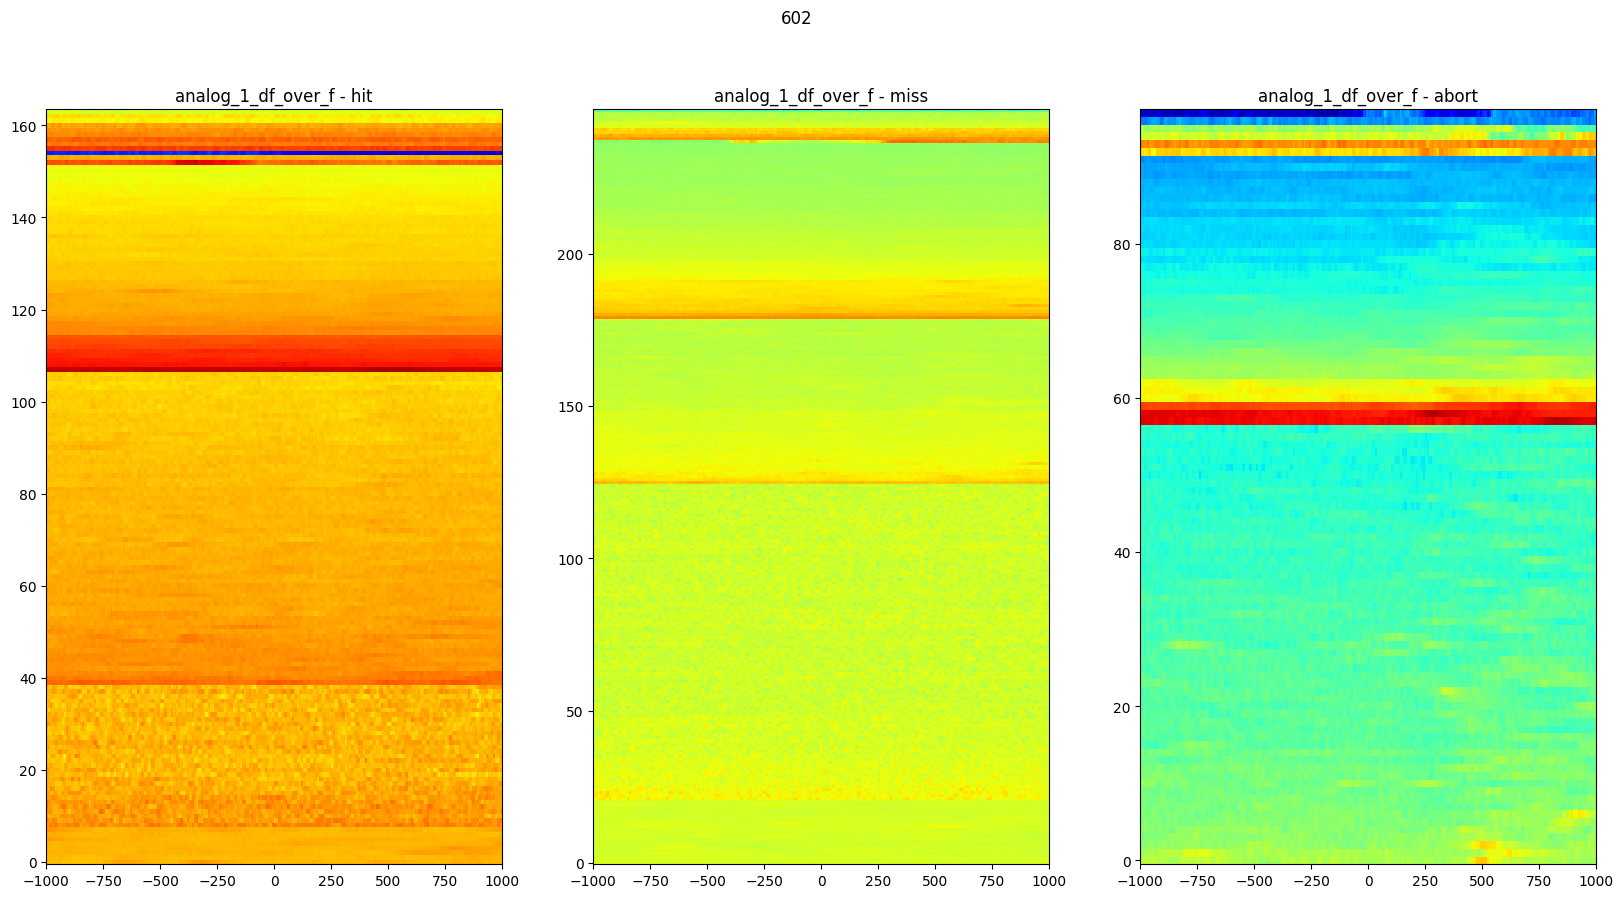

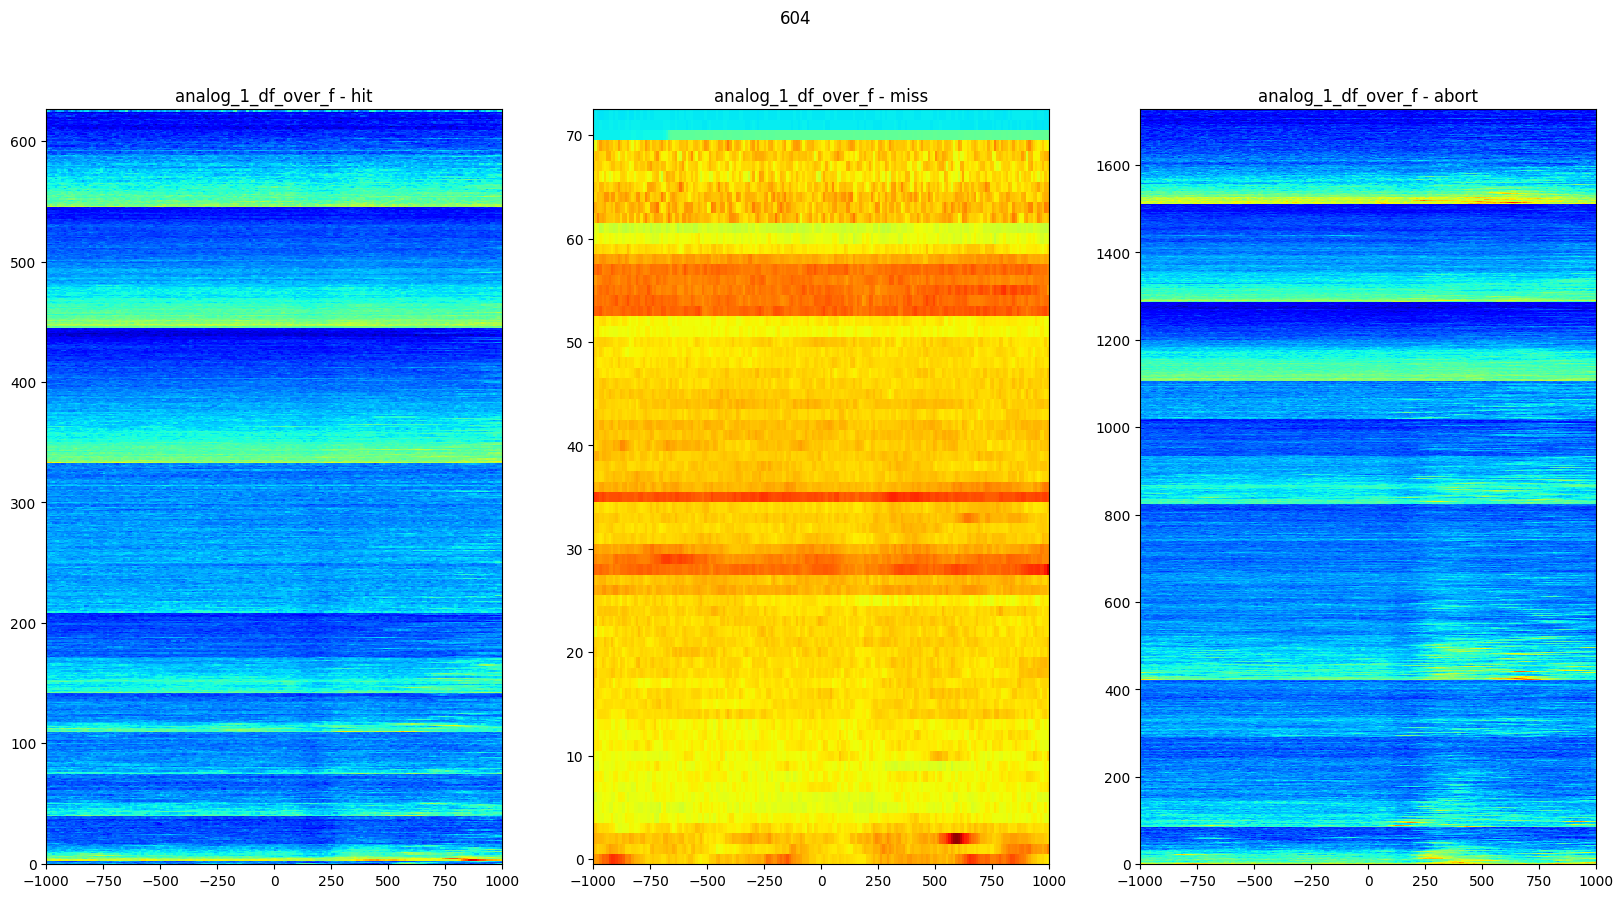

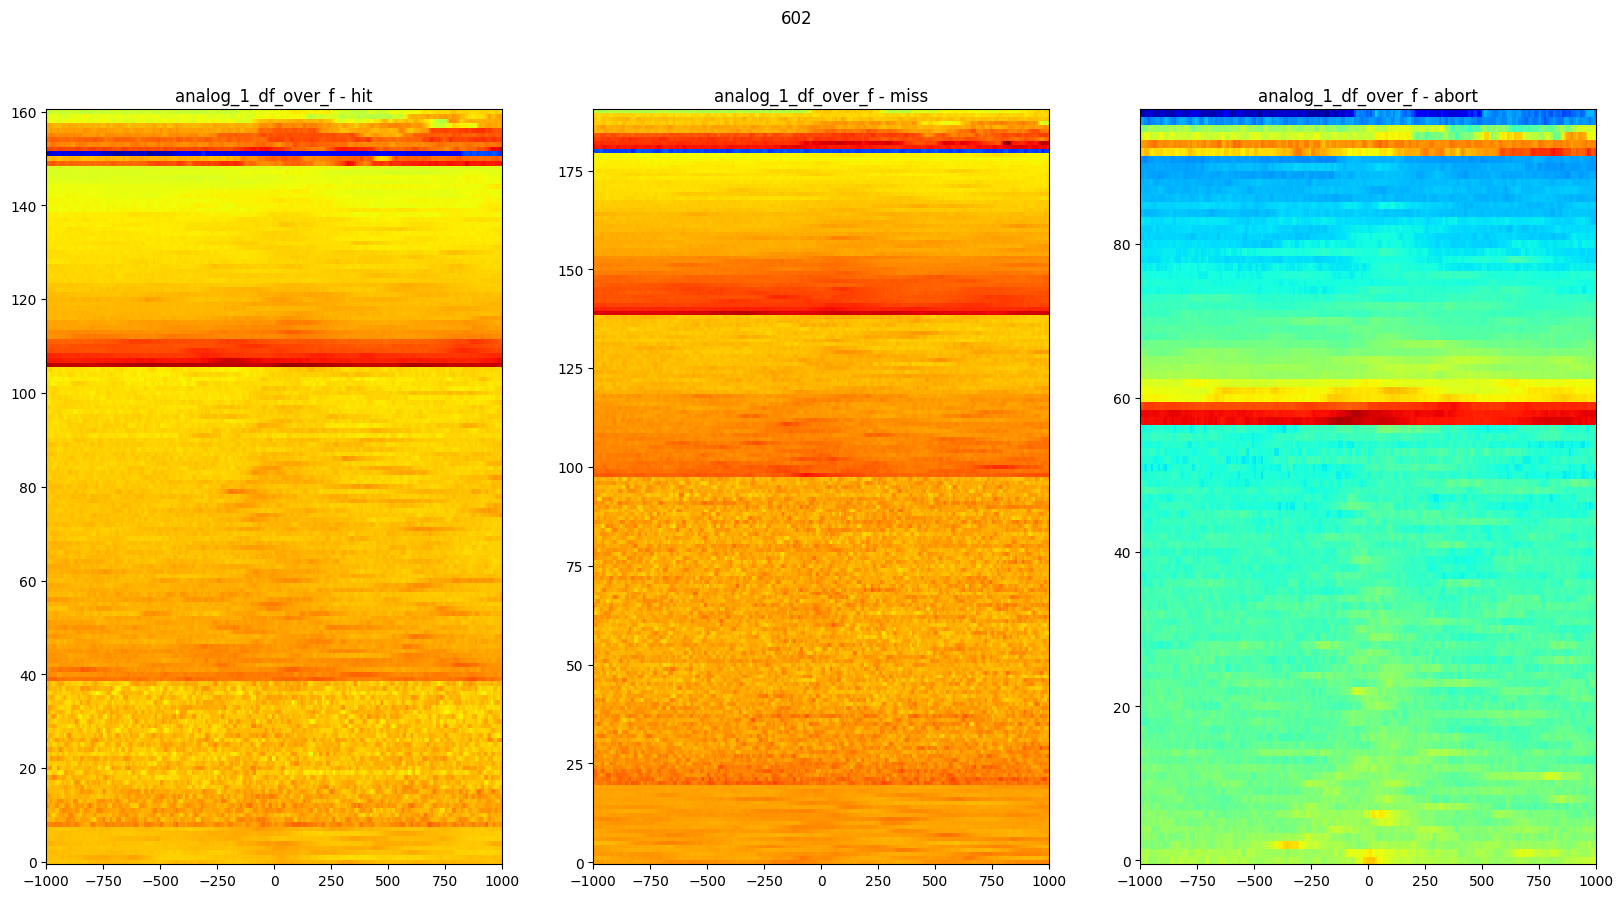

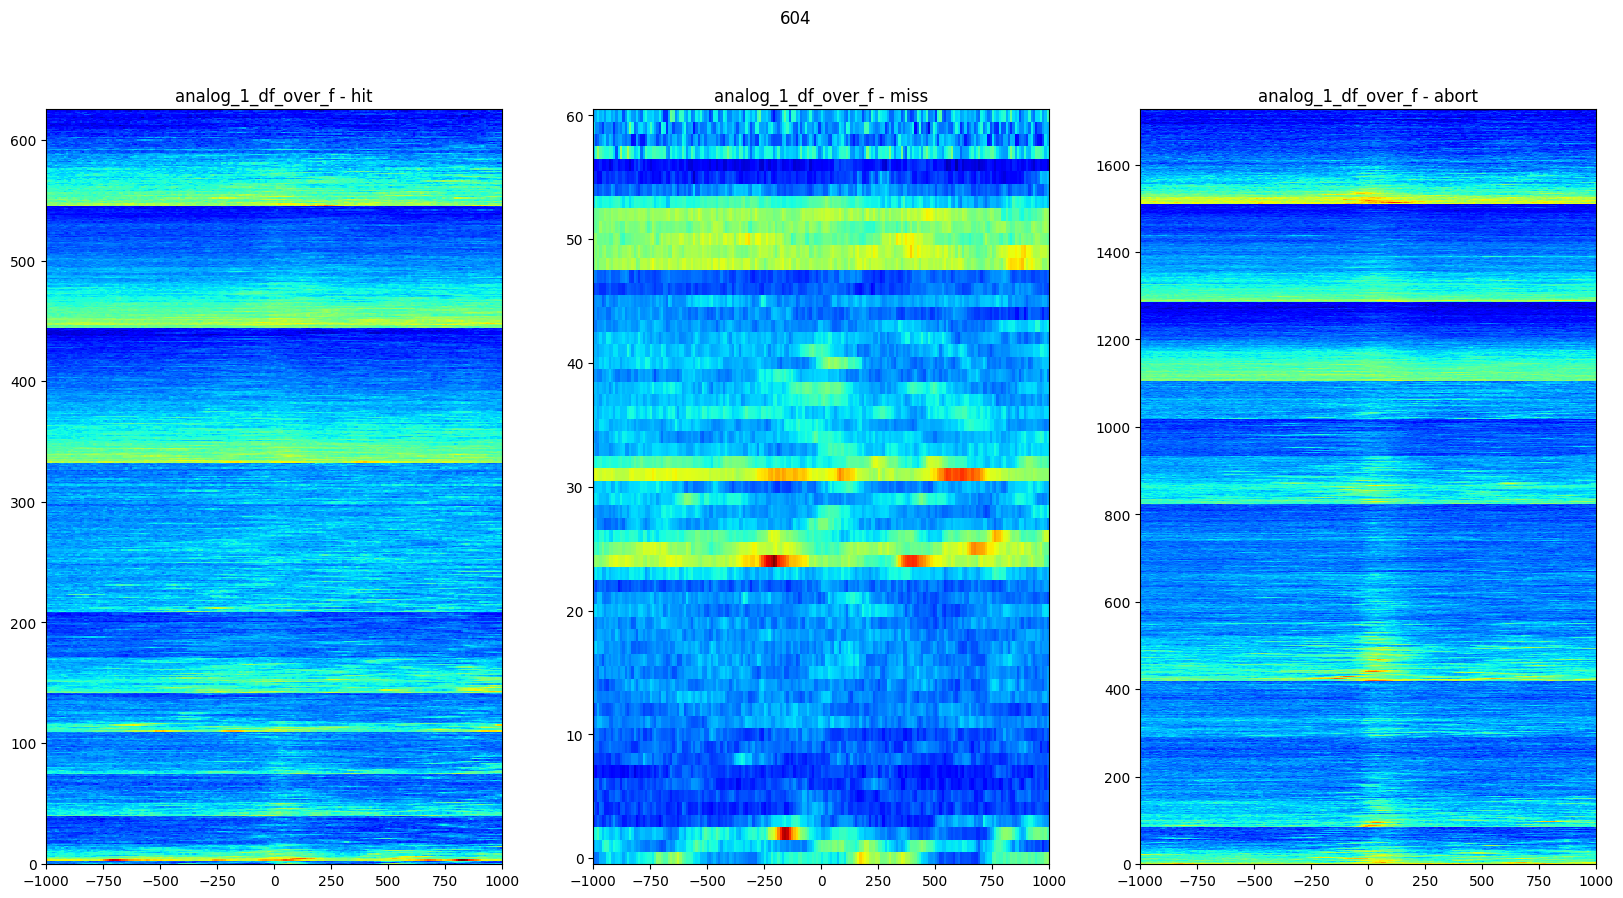

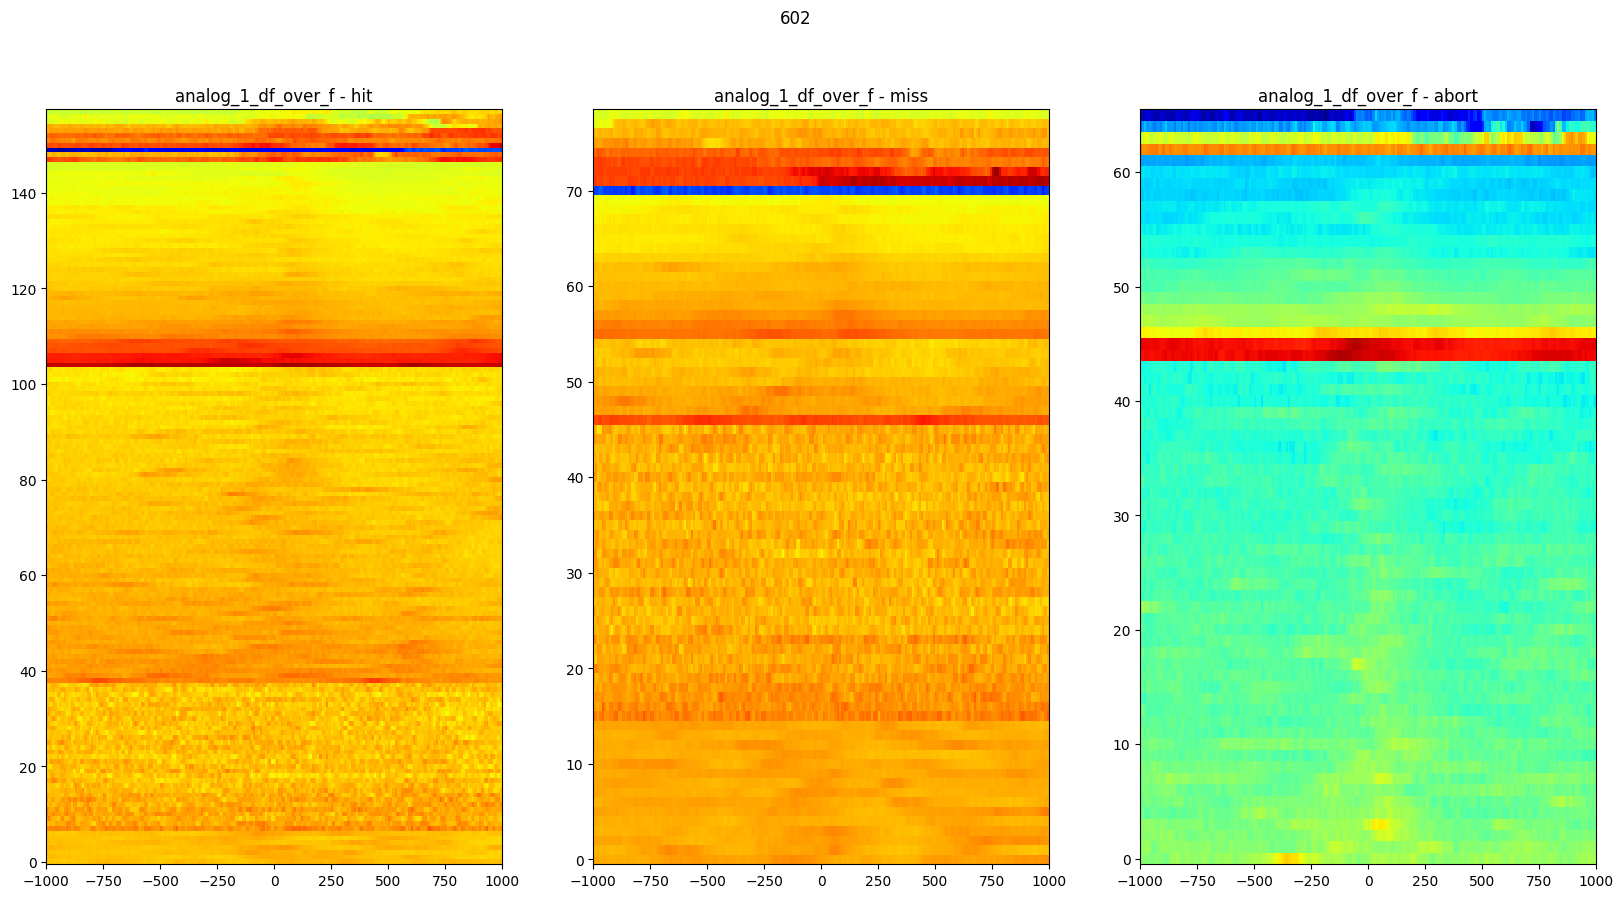

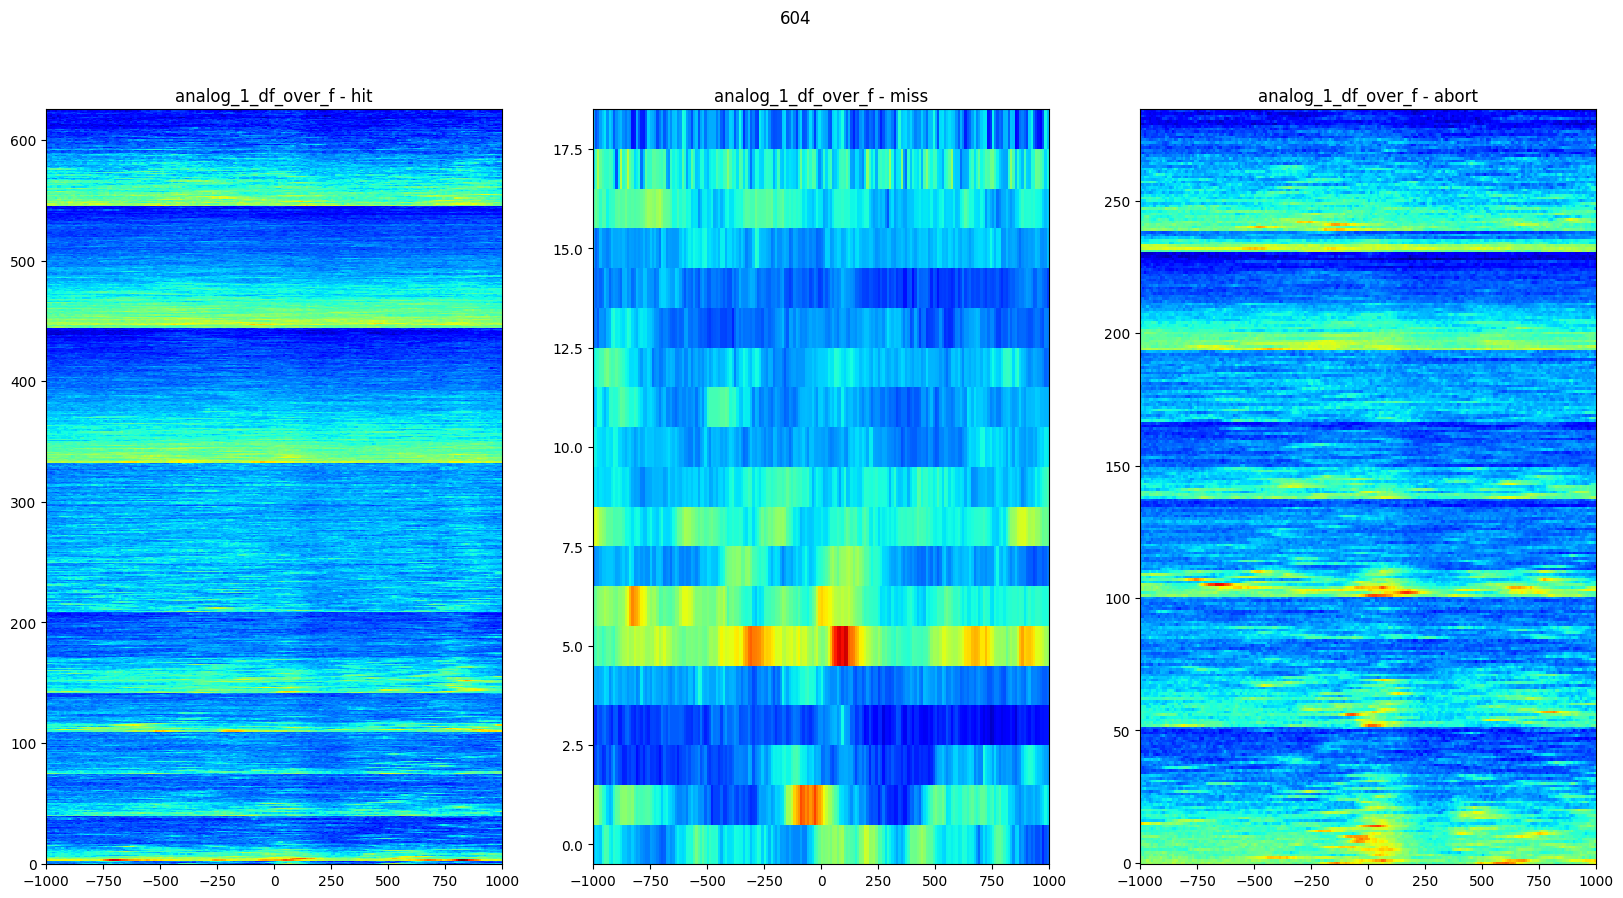

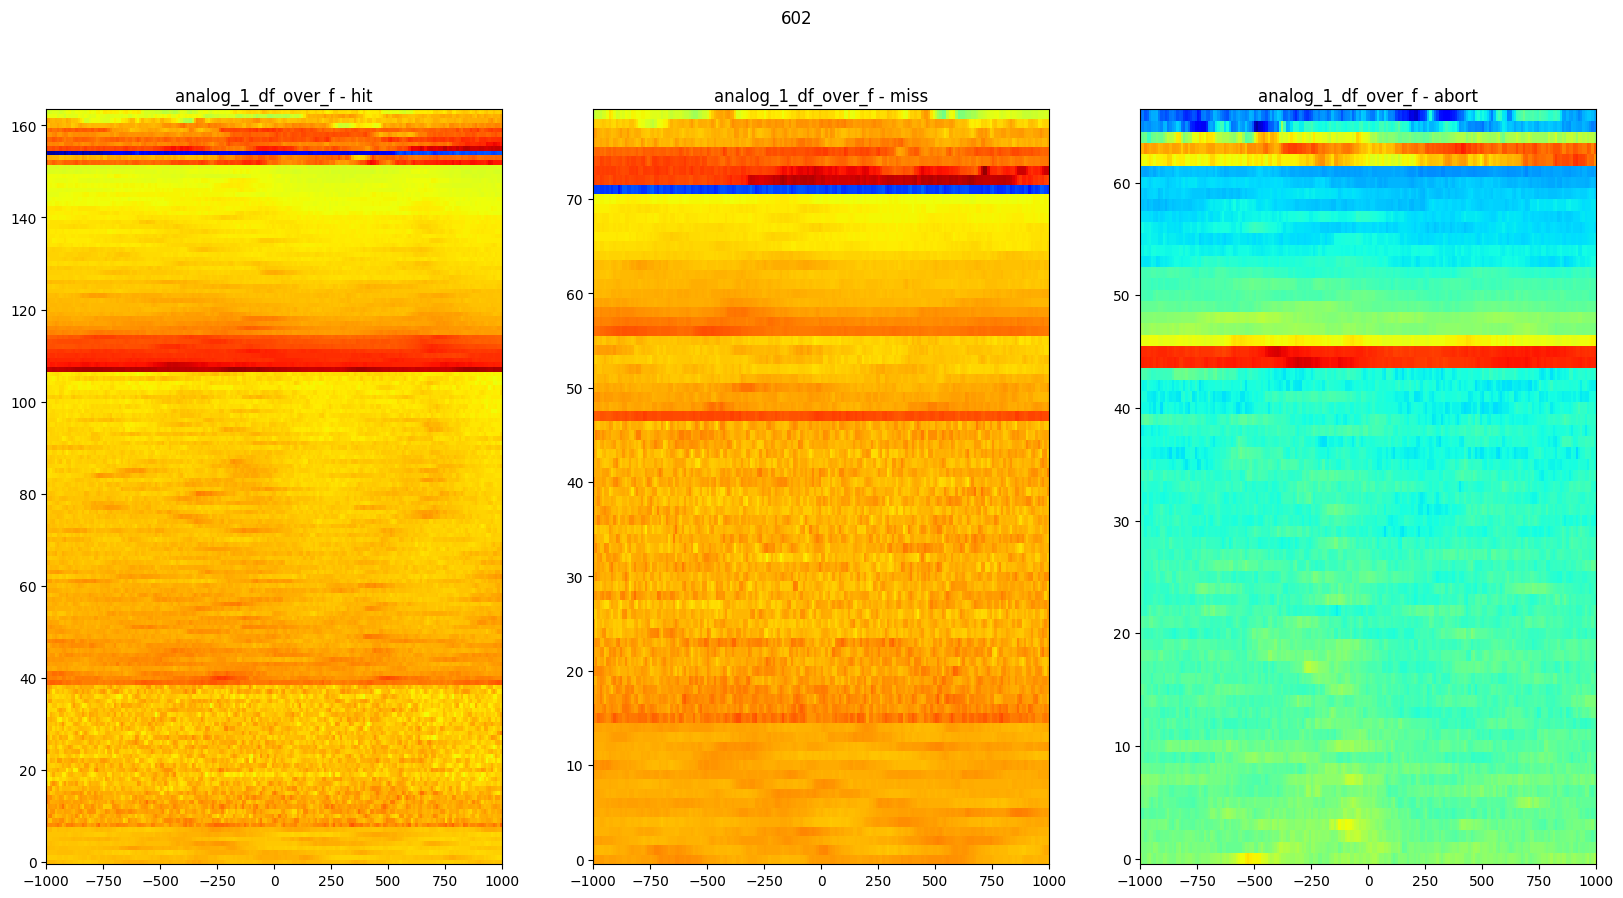

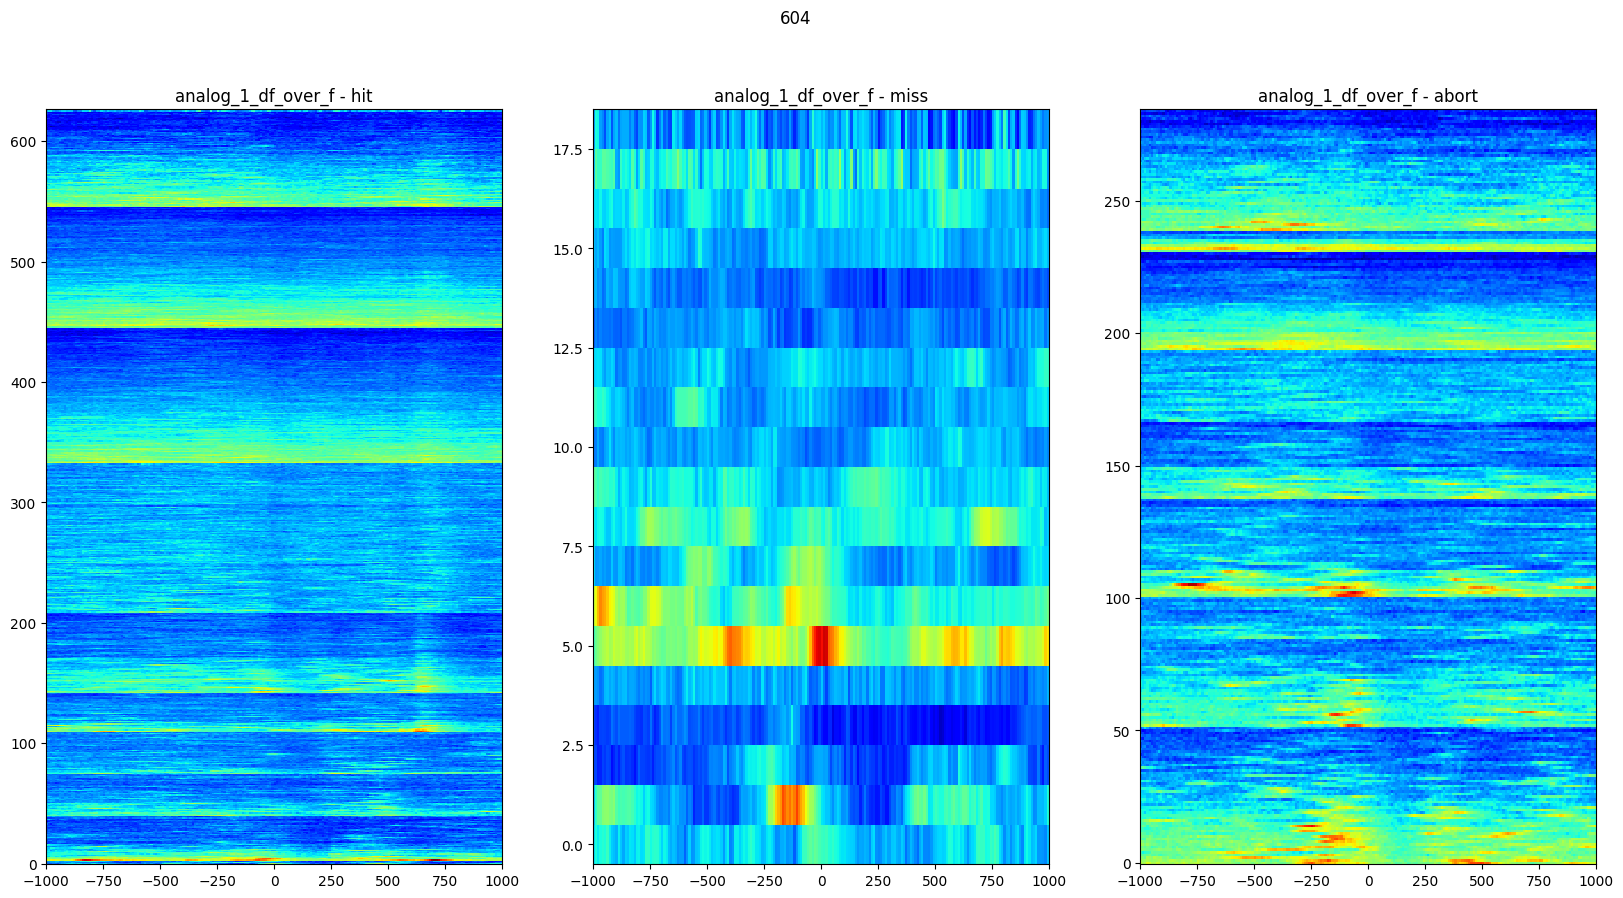

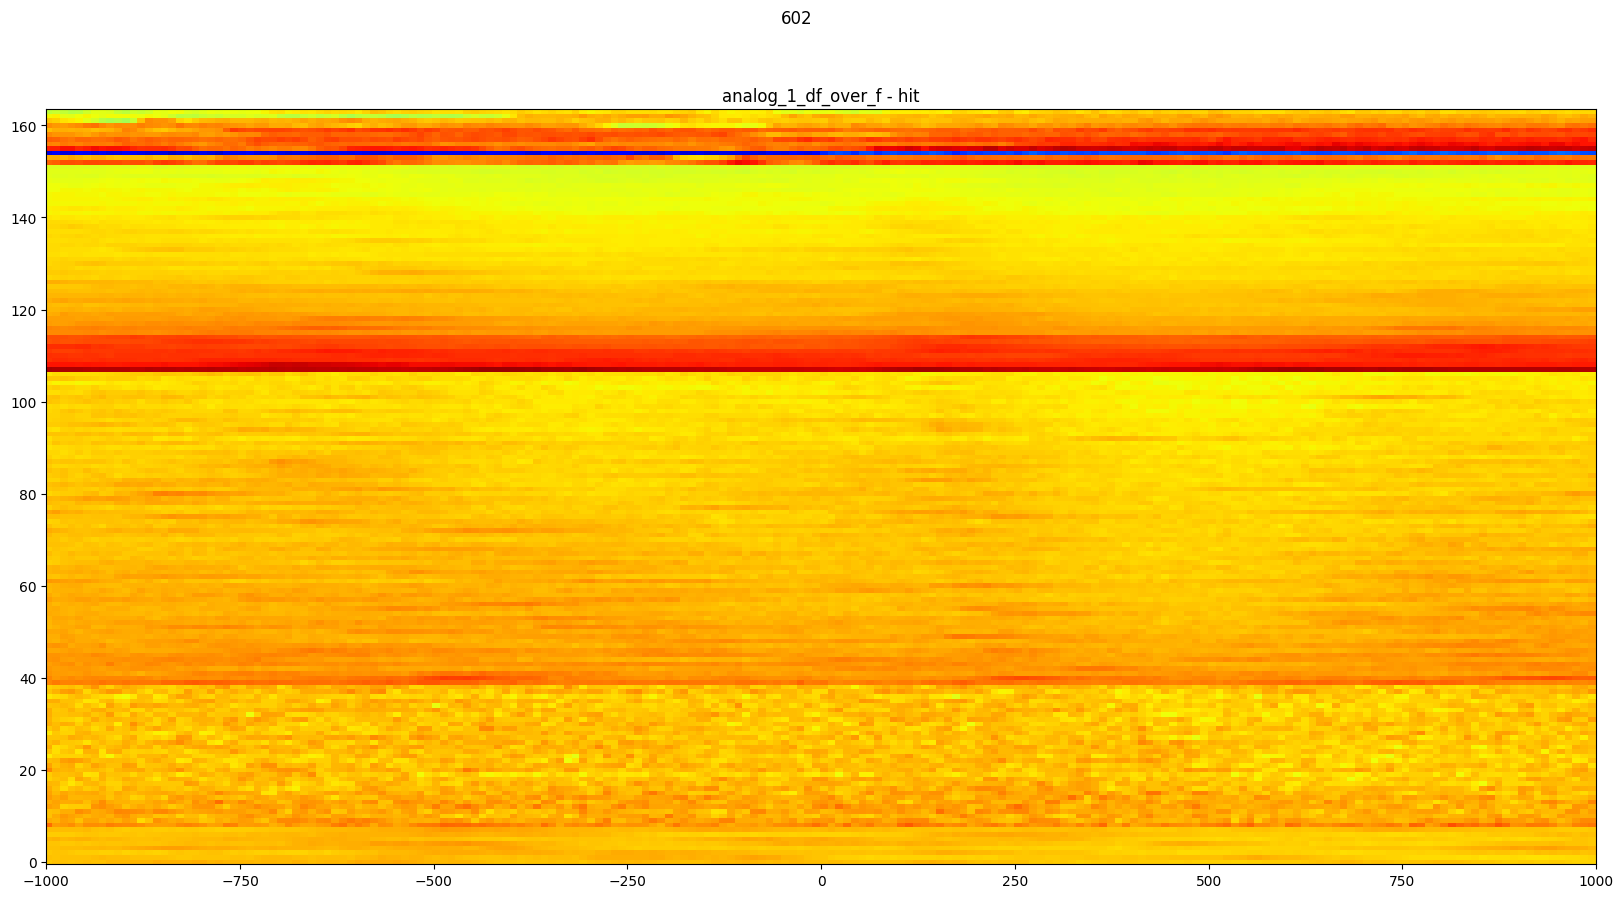

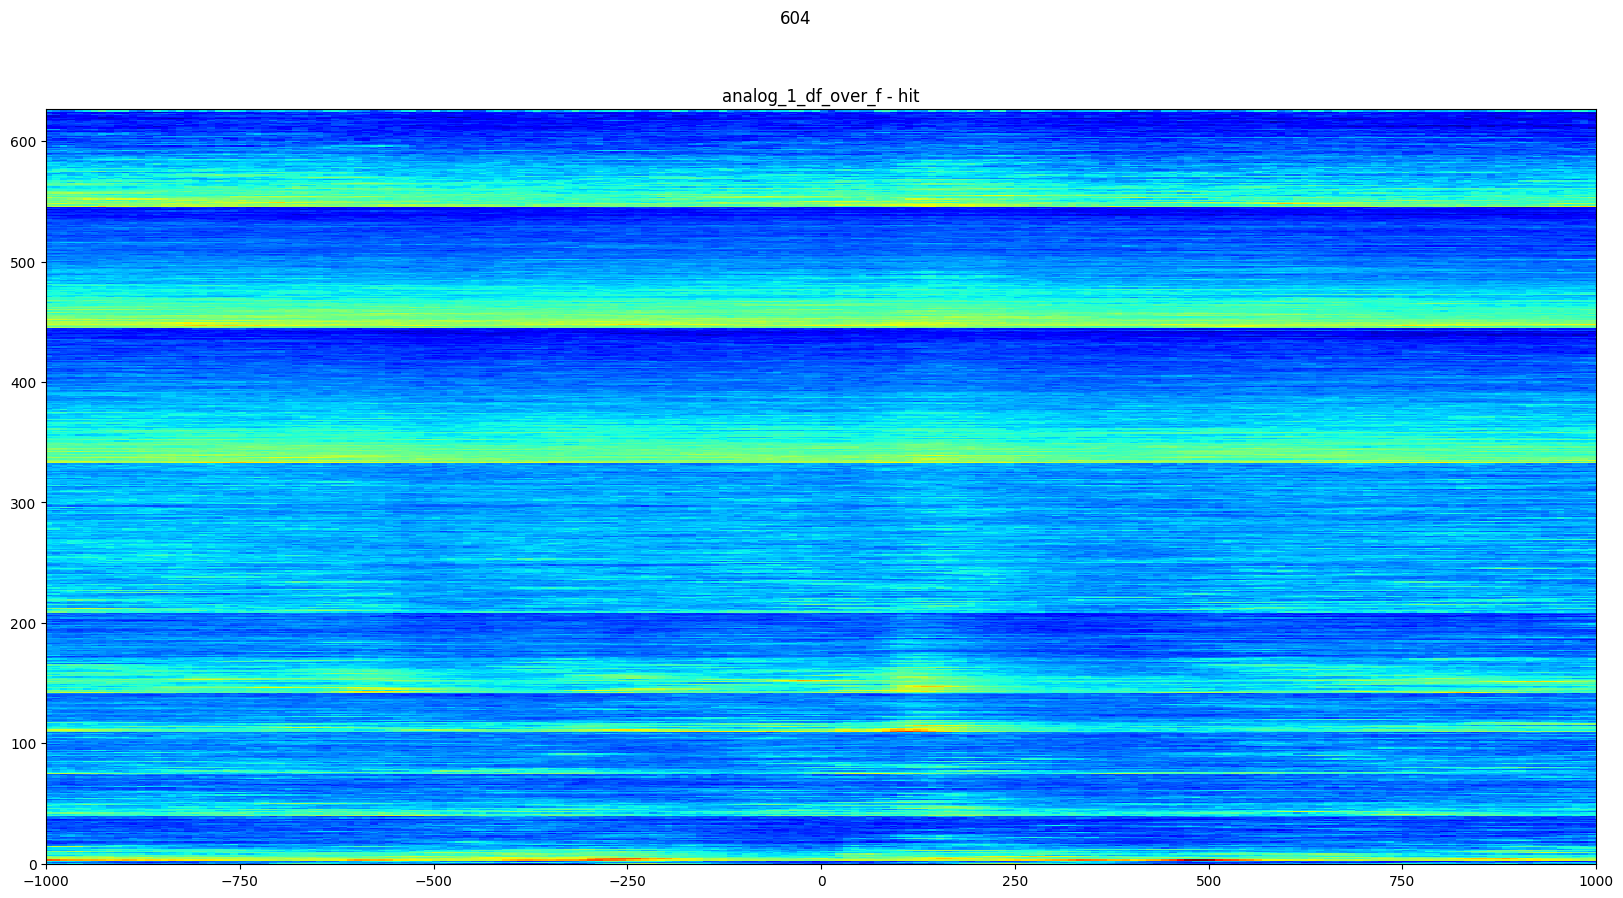

In [115]:
for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([603])
    # photo_dataset[idx].filterout_dates(bad_days)
    # photo_dataset[idx].filter_lastNsessions(n = 1)
    photo_dataset[idx].heatmap(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 1000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()

In [ ]:
bad_days[-1]


Timestamp('2022-12-19 11:15:41')

In [ ]:
rec_day_meta = photo_dataset[0].metadata_df[(photo_dataset[0].metadata_df.subject_ID == 316)
    & (photo_dataset[0].metadata_df.datetime == bad_days[-1])]
rec_day_meta

subject_ID            datetime  \
219        316 2022-12-19 11:15:41   
220        316 2022-12-19 11:15:41   
221        316 2022-12-19 11:15:41   
222        316 2022-12-19 11:15:41   
223        316 2022-12-19 11:15:41   
224        316 2022-12-19 11:15:41   
225        316 2022-12-19 11:15:41   
226        316 2022-12-19 11:15:41   
227        316 2022-12-19 11:15:41   
228        316 2022-12-19 11:15:41   
229        316 2022-12-19 11:15:41   
230        316 2022-12-19 11:15:41   
231        316 2022-12-19 11:15:41   
232        316 2022-12-19 11:15:41   
233        316 2022-12-19 11:15:41   
234        316 2022-12-19 11:15:41   
235        316 2022-12-19 11:15:41   
236        316 2022-12-19 11:15:41   
237        316 2022-12-19 11:15:41   
238        316 2022-12-19 11:15:41   
239        316 2022-12-19 11:15:41   
240        316 2022-12-19 11:15:41   
241        316 2022-12-19 11:15:41   
242        316 2022-12-19 11:15:41   
243        316 2022-12-19 11:15:41   
244        316 2022-12-19 11:15:41   
245        316 2022-12-19 11:15:41   
246        316 2022-12-19 11:15:41   

                                       task_name condition_ID trial_nb  \
219  reaching_go_spout_bar_dual_all_reward_dec22            0        1   
220  reaching_go_spout_bar_dual_all_reward_dec22            0       30   
221  reaching_go_spout_bar_dual_all_reward_dec22            0       37   
222  reaching_go_spout_bar_dual_all_reward_dec22            0       40   
223  reaching_go_spout_bar_dual_all_reward_dec22            0       49   
224  reaching_go_spout_bar_dual_all_reward_dec22            0       64   
225  reaching_go_spout_bar_dual_all_reward_dec22            0       66   
226  reaching_go_spout_bar_dual_all_reward_dec22            0       79   
227  reaching_go_spout_bar_dual_all_reward_dec22            0       87   
228  reaching_go_spout_bar_dual_all_reward_dec22            0       93   
229  reaching_go_spout_bar_dual_all_reward_dec22            0      108   
230  reaching_go_spout_bar_dual_all_reward_dec22            0      112   
231  reaching_go_spout_bar_dual_all_reward_dec22            0      132   
232  reaching_go_spout_bar_dual_all_reward_dec22            0      136   
233  reaching_go_spout_bar_dual_all_reward_dec22            0      141   
234  reaching_go_spout_bar_dual_all_reward_dec22            0      144   
235  reaching_go_spout_bar_dual_all_reward_dec22            0      146   
236  reaching_go_spout_bar_dual_all_reward_dec22            0      153   
237  reaching_go_spout_bar_dual_all_reward_dec22            0      156   
238  reaching_go_spout_bar_dual_all_reward_dec22            0      162   
239  reaching_go_spout_bar_dual_all_reward_dec22            0      165   
240  reaching_go_spout_bar_dual_all_reward_dec22            0      167   
241  reaching_go_spout_bar_dual_all_reward_dec22            0      176   
242  reaching_go_spout_bar_dual_all_reward_dec22            1       14   
243  reaching_go_spout_bar_dual_all_reward_dec22            1       31   
244  reaching_go_spout_bar_dual_all_reward_dec22            1       50   
245  reaching_go_spout_bar_dual_all_reward_dec22            1       77   
246  reaching_go_spout_bar_dual_all_reward_dec22            1      147   

     session_nb  group_ID  keep  trial_ID  
219          15         0  True       219  
220          15         0  True       220  
221          15         0  True       221  
222          15         0  True       222  
223          15         0  True       223  
224          15         0  True       224  
225          15         0  True       225  
226          15         0  True       226  
227          15         0  True       227  
228          15         0  True       228  
229          15         0  True       229  
230          15         0  True       230  
231          15         0  True       231  
232          15         0  True       232  
233          15         0  True       233  
234          15         0  True       234  
235   